# Animal classification

## import library

TensorFlow is an open-source library developed by Google for machine learning and artificial intelligence. It provides a comprehensive ecosystem for building, training, and deploying machine learning models. TensorFlow supports deep learning, which involves neural networks with multiple layers, and offers tools for a variety of tasks such as image and speech recognition, natural language processing, and predictive analytics. It’s known for its flexibility, scalability, and ability to run on different platforms, from desktops to mobile devices.

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets , layers , models
import matplotlib.pyplot as plt  
import numpy as np

: 

## Import and Explore Data

The CIFAR-10 dataset consists of 60,000 32x32 color images in 10 different classes, with 6,000 images per class. It is divided into 50,000 training images and 10,000 test images. The classes include: 

1. Airplane
2. Automobile
3. Bird
4. Cat
5. Deer
6. Dog
7. Frog
8. Horse
9. Ship
10. Truck

In [113]:
(train_img,train_lab), (test_img,test_lab) = datasets.cifar10.load_data()

In [114]:
print (f" train image shape : {train_img.shape}")
print (f" train image shape : {train_lab.shape}")
print (f" train image shape : {test_img.shape}")
print (f" train image shape : {test_lab.shape}")

 train image shape : (50000, 32, 32, 3)
 train image shape : (50000, 1)
 train image shape : (10000, 32, 32, 3)
 train image shape : (10000, 1)


In [115]:
train_img

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [116]:
train_lab

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

####  Normalize pixel values to be between 0 and 1

In [117]:
train_img,test_img = train_img /255 ,test_img/255

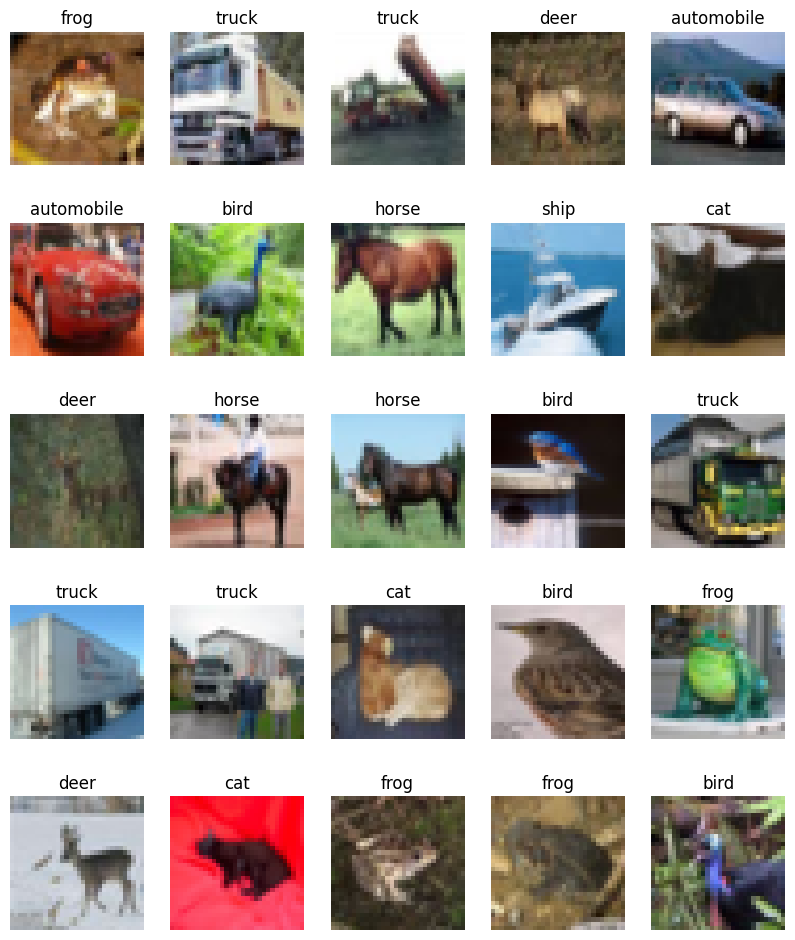

In [118]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.axis(False)
    plt.title(class_names[train_lab[i][0]])
    plt.imshow(train_img[i])
    
plt.show()

## Build Model

A Convolutional Neural Network (CNN) is a type of neural network designed to process and analyze visual data. Its architecture is particularly effective for image recognition and classification tasks. Here’s a simplified explanation of the main components and layers in a CNN:

1. **Convolutional Layer**:
   - **Function**: Applies convolutional filters (kernels) to the input image to extract features such as edges, textures, and patterns.
   - **Operation**: Each filter slides (convolves) over the image and performs element-wise multiplication and summation to produce feature maps (or activation maps).

2. **Activation Function (ReLU)**:
   - **Function**: Introduces non-linearity into the model to help it learn complex patterns.
   - **Operation**: The Rectified Linear Unit (ReLU) function replaces negative values in the feature maps with zero, keeping positive values unchanged.

3. **Pooling Layer**:
   - **Function**: Reduces the spatial dimensions (width and height) of the feature maps while retaining important features.
   - **Operation**: Common pooling methods include max pooling (selecting the maximum value in a region) and average pooling (calculating the average value).

4. **Flattening**:
   - **Function**: Converts the 2D feature maps into a 1D vector.
   - **Operation**: This step prepares the data for the fully connected layers.

5. **Fully Connected (Dense) Layer**:
   - **Function**: Connects every neuron from the previous layer to each neuron in the current layer, enabling the network to learn complex representations.
   - **Operation**: Performs matrix multiplication followed by an activation function to produce the final output.

6. **Output Layer**:
   - **Function**: Provides the final classification or prediction based on the learned features.
   - **Operation**: Uses activation functions like Softmax for classification tasks to output probabilities for each class.

**Architecture Flow**:
1. **Input Layer**: Receives the raw image data.
2. **Convolutional Layers**: Extracts features from the image.
3. **Activation Layers**: Applies non-linearity to the extracted features.
4. **Pooling Layers**: Reduces the dimensionality of feature maps.
5. **Flattening**: Converts 2D features to 1D.
6. **Fully Connected Layers**: Learns complex patterns and makes predictions.
7. **Output Layer**: Produces the final classification or prediction. 

This combination of layers helps CNNs efficiently process and recognize visual patterns in images.

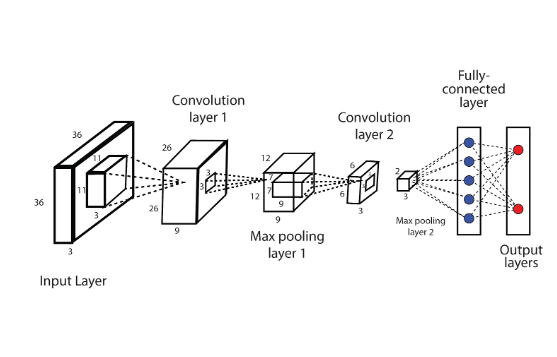

In [119]:
model= models.Sequential()
model.add(layers.Conv2D(40,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(70,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(80,(3,3),activation='relu'))

d:\github\simple-deep-learning-project\deep\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Here’s an explanation of each layer in your CNN model along with the calculation of the parameters for each convolutional layer:

### **Layer Details**

1. **Conv2D (First Convolutional Layer)**:
   - **Output Shape**: `(None, 30, 30, 40)`
   - **Parameters**: `1,120`
   - **Calculation**:
     - Assuming the input image size is `(32, 32, 3)` and the convolutional layer has `40` filters with a kernel size of `(3, 3)`.
     - The formula for parameters in a Conv2D layer is: \[ \text{Parameters} = (\text{Kernel Width} \times \text{Kernel Height} \times \text{Input Channels} + 1) \times \text{Number of Filters} \]
     - Calculation: \[ (3 \times 3 \times 3 + 1) \times 40 = (27 + 1) \times 40 = 28 \times 40 = 1,120 \]

2. **MaxPooling2D (First Pooling Layer)**:
   - **Output Shape**: `(None, 15, 15, 40)`
   - **Parameters**: `0`
   - **Explanation**: MaxPooling layers don’t have learnable parameters; they only perform a downsampling operation.

3. **Conv2D (Second Convolutional Layer)**:
   - **Output Shape**: `(None, 13, 13, 70)`
   - **Parameters**: `25,270`
   - **Calculation**:
     - This layer has `70` filters with a kernel size of `(3, 3)` and takes the previous layer's output with `40` channels.
     - Calculation: \[ (3 \times 3 \times 40 + 1) \times 70 = (360 + 1) \times 70 = 361 \times 70 = 25,270 \]

4. **MaxPooling2D (Second Pooling Layer)**:
   - **Output Shape**: `(None, 6, 6, 70)`
   - **Parameters**: `0`
   - **Explanation**: Same as before, this layer only performs downsampling without learnable parameters.

5. **Conv2D (Third Convolutional Layer)**:
   - **Output Shape**: `(None, 4, 4, 80)`
   - **Parameters**: `50,480`
   - **Calculation**:
     - This layer has `80` filters with a kernel size of `(3, 3)` and takes the previous layer's output with `70` channels.
     - Calculation: \[ (3 \times 3 \times 70 + 1) \times 80 = (630 + 1) \times 80 = 631 \times 80 = 50,480 \]

### **Total Parameters**
- **Total Trainable Parameters**: `76,870`
- **Non-Trainable Parameters**: `0`

### **Summary**
- The model has a total of `76,870` parameters that are trainable, distributed across three convolutional layers, and no parameters in the max pooling layers. This count includes the weights and biases for each convolutional layer.

In [120]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 30, 30, 40)     │         1,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 15, 15, 40)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 13, 13, 70)     │        25,270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 6, 6, 70)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 4, 4, 80)       │        50,480 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 76,870 (300.27 KB)

 Trainable params: 76,870 (300.27 KB)

 Non-trainable params: 0 (0.00 B)

In [121]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation="softmax"))

In [122]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 30, 30, 40)     │         1,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 15, 15, 40)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 13, 13, 70)     │        25,270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 6, 6, 70)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 4, 4, 80)       │        50,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │        81,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 159,504 (623.06 KB)

 Trainable params: 159,504 (623.06 KB)

 Non-trainable params: 0 (0.00 B)

The `model.compile` method in TensorFlow is used to configure the model before training. Here’s a detailed explanation of each component, with examples and possible options:

### **1. Optimizer**

The optimizer is responsible for updating the model’s weights during training to minimize the loss function. Optimizers are crucial for efficient learning.

- **`'adam'`**:
  - **Description**: Adam (Adaptive Moment Estimation) combines the benefits of two other extensions of stochastic gradient descent: AdaGrad and RMSProp. It adapts the learning rates for each parameter using estimates of first and second moments of the gradients.
  - **Advantages**: Effective for a wide range of problems, often fast, and requires minimal tuning.
  - **Options**: `learning_rate`, `beta_1`, `beta_2`, `epsilon`.

- **Other Optimizers**:
  - **`'sgd'` (Stochastic Gradient Descent)**:
    - **Description**: One of the simplest optimizers. It updates the weights based on the average gradient of the samples.
    - **Advantages**: Simple, often used in classical approaches.
    - **Options**: `learning_rate`, `momentum`, `nesterov`.
  
  - **`'rmsprop'`**:
    - **Description**: Adapts the learning rates for each parameter using a moving average of squared gradients.
    - **Advantages**: Good for problems with gradients of varying scales.
    - **Options**: `learning_rate`, `rho`, `momentum`, `epsilon`.
  
  - **`'adagrad'`**:
    - **Description**: Adapts the learning rates for each parameter using a cumulative sum of squared gradients.
    - **Advantages**: Useful when parameters have very different update frequencies.
    - **Options**: `learning_rate`, `epsilon`.
  
  - **`'adadelta'`**:
    - **Description**: An extension of AdaGrad that limits the accumulation of squared gradients instead of dividing directly.
    - **Advantages**: Avoids the problem of rapidly decreasing learning rates.
    - **Options**: `learning_rate`, `rho`, `epsilon`.

### **2. Loss (Loss Function)**

The loss function measures the difference between the model’s predictions and the actual values. The goal is to minimize this loss during training.

- **`tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)`**:
  - **Description**: Used for multi-class classification problems where labels are integers. `from_logits=True` indicates that the model’s outputs are logits (unnormalized values) rather than probabilities.
  - **Advantages**: Suitable for classification tasks with integer labels.

- **Other Loss Functions**:
  - **`tf.keras.losses.CategoricalCrossentropy(from_logits=False)`**:
    - **Description**: Used for multi-class classification problems where labels are one-hot encoded vectors (probability vectors).
    - **Advantages**: Useful when labels are already in probability form.
  
  - **`tf.keras.losses.BinaryCrossentropy(from_logits=False)`**:
    - **Description**: Used for binary classification problems.
    - **Advantages**: Suitable for tasks with two classes.

  - **`tf.keras.losses.MeanSquaredError()`**:
    - **Description**: Used for regression problems. Measures the average of the squares of errors between predictions and actual values.
    - **Advantages**: Commonly used for regression tasks.

  - **`tf.keras.losses.MeanAbsoluteError()`**:
    - **Description**: Used for regression problems. Measures the average of the absolute errors between predictions and actual values.
    - **Advantages**: Less sensitive to outliers compared to Mean Squared Error (MSE).

### **3. Metrics**

Metrics are used to evaluate the performance of the model during training and evaluation.

- **`'accuracy'`**:
  - **Description**: Measures the proportion of correct predictions over the total number of predictions.
  - **Advantages**: Simple and commonly used for classification tasks.

- **Other Metrics**:
  - **`'precision'`**:
    - **Description**: Measures the proportion of true positives among all instances classified as positive.
    - **Advantages**: Important for tasks where false positives have a high cost.

  - **`'recall'`**:
    - **Description**: Measures the proportion of true positives among all actual positives.
    - **Advantages**: Important for tasks where false negatives have a high cost.

  - **`'f1_score'`**:
    - **Description**: The harmonic mean of precision and recall.
    - **Advantages**: Provides a balance between precision and recall, useful for imbalanced datasets.

  - **`'AUC'`**:
    - **Description**: Measures the area under the ROC (Receiver Operating Characteristic) curve, useful for evaluating binary classification performance.
    - **Advantages**: Allows evaluation of classification performance independently of the decision threshold.

In summary, `model.compile` sets up the model by specifying how it should learn (with which optimizer), how to assess the quality of its predictions (with which loss function), and how to track its performance during training (with which metrics).

In [123]:
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [125]:
history= model.fit(train_img, train_lab,epochs=10,validation_data=(test_img,test_lab))

Epoch 1/10


d:\github\simple-deep-learning-project\deep\Lib\site-packages\keras\src\backend\tensorflow\nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 27ms/step - accuracy: 0.3492 - loss: 1.7520 - val_accuracy: 0.5514 - val_loss: 1.2373
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.5782 - loss: 1.1802 - val_accuracy: 0.6269 - val_loss: 1.0489
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.6476 - loss: 1.0033 - val_accuracy: 0.6502 - val_loss: 1.0007
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.6859 - loss: 0.8929 - val_accuracy: 0.6695 - val_loss: 0.9520
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.7159 - loss: 0.8105 - val_accuracy: 0.6982 - val_loss: 0.8600
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.7419 - loss: 0.7461 - val_accuracy: 0.7077 - val_loss: 0.8470
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 38ms/step - accuracy: 0.7594 - loss: 0.6907 - val_accuracy: 0.7087 - val_loss: 0.8567
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.7770 - loss: 0.63

## Model Evaluation

In [126]:
model.evaluate(test_img,test_lab, verbose=2)

313/313 - 4s - 13ms/step - accuracy: 0.7113 - loss: 0.8734


[0.8734065294265747, 0.7113000154495239]

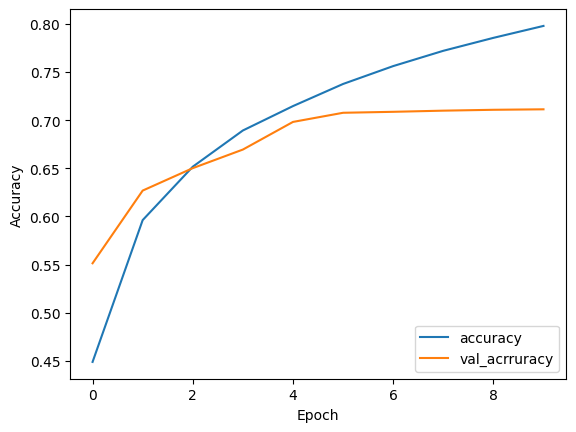

In [127]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_acrruracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc="lower right")

In [128]:


# Assuming test_img[0] is a single image with shape (32, 32, 3)
# Normalize the image
normalized_img = test_img[0] 

# Add batch dimension
input_img = np.expand_dims(normalized_img, axis=0)  # Shape will be (1, 32, 32, 3)

# Predict
predictions = model.predict(input_img)

# Print predictions
print(predictions*10)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
[[2.09574439e-02 4.66286531e-03 6.33475929e-02 9.73879719e+00
  3.87424813e-03 1.19811974e-01 3.07672247e-02 6.86842832e-04
  1.08294673e-02 6.26513315e-03]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


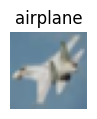

0


In [129]:
def predict(indice):
    
    input_img = np.expand_dims(test_img[indice],axis=0)
    predictions = model.predict(input_img)
    x = 0
    for i in range(9):
        if predictions[0][i]>=predictions[0][x] :
            x =i
    
    plt.figure(figsize=(2,1))
    plt.imshow(test_img[indice])
    plt.title(class_names[x])
    plt.axis(False)
    plt.show()
    return x 

print(predict(10))
    

In [130]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


predictions = model.predict(test_img)


predicted_classes = np.argmax(predictions, axis=1)

true_labels = test_lab.flatten()


accuracy = accuracy_score(true_labels, predicted_classes)
precision = precision_score(true_labels, predicted_classes, average='weighted')
recall = recall_score(true_labels, predicted_classes, average='weighted')
f1 = f1_score(true_labels, predicted_classes, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step
Accuracy: 0.7113
Precision: 0.7134
Recall: 0.7113
F1 Score: 0.7094


In [131]:
print(type(train_img))

<class 'numpy.ndarray'>
